In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime

In [2]:
ground_state = 578

In [3]:
def parse_data(filename):
    with open(filename) as f:
        lines = f.readlines()

    for i in range(len(lines)):
        lines[i] = re.match(r'.*= (.*)', lines[i]).group(1)
        lines[i] = lines[i].strip('][').split(', ')
        lines[i] = [int(x) for x in lines[i]]

    means = []
    medians = []
    mins = []
    
    for i in range(len(lines)):
        means.append(np.mean(lines[i]))
        medians.append(np.median(lines[i]))
        mins.append(min(lines[i]))
    
    return means, medians, mins

In [34]:
var_reads_10s = parse_data("newoutputs/500_reads10.out")
var_reads_100s = parse_data("newoutputs/500_reads100.out")
var_reads_1000s = parse_data("newoutputs/500_reads1000.out")
var_read_sweeps = parse_data("var_sweeps.out")
var_beta_10s = parse_data("betaoutput/500_runs_10_reads_-3-1_beta.out")
var_beta_100s = parse_data("betaoutput/500_runs_100_reads_-3-1_beta.out")
var_beta_1000s = parse_data("betaoutput/500_runs_1000_reads_-3-1_beta.out")
var_beta_2 = parse_data("betaoutput/500_runs_100_reads_-4--1_beta.out")
var_beta_3 = parse_data("betaoutput/500_runs_100_reads_-5--2_beta.out")
var_beta_4 = parse_data("betaoutput/500_runs_100_reads_-3--1_beta.out")
var_beta_5 = parse_data("betaoutput/500_runs_100_reads_-3--2_beta.out")
var_beta_6 = parse_data("betaoutput/500_runs_100_reads_-2-1_beta.out")
var_beta_7 = parse_data("betaoutput/500_runs_100_reads_-1-2_beta.out")
var_beta_8 = parse_data("betaoutput/500_runs_1000_reads_-2-1_beta.out")

[Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value')]

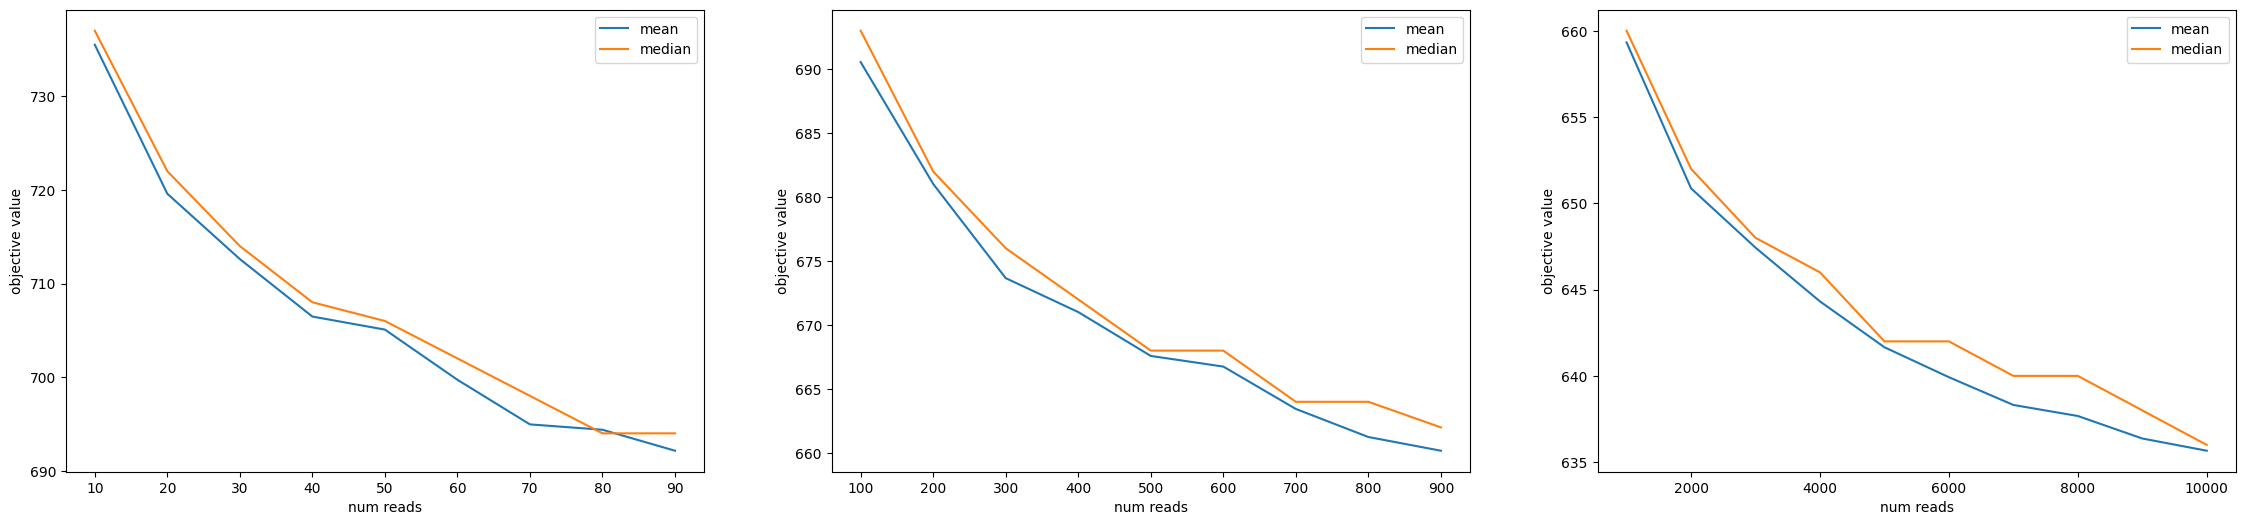

In [5]:
figure, axes = plt.subplots(1, 3, figsize=(28, 6))

sns.lineplot(x=range(10, 100, 10), y=var_reads_10s[0], ax=axes[0], label="mean")
sns.lineplot(x=range(10, 100, 10), y=var_reads_10s[1], ax=axes[0], label="median")
sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[0], ax=axes[1], label="mean")
sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[1], ax=axes[1], label="median")
sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[0], ax=axes[2], label="mean")
sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[1], ax=axes[2], label="median")
# sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[2], ax=axes[2], label="min")
# sns.lineplot(x=range(1000, 11000, 1000), y=[ground_state]*10, ax=axes[2], ls='--', label="ground state")

plt.setp(axes[:], xlabel="num reads", ylabel="objective value")

In [6]:
min(var_reads_1000s[2])

590

<AxesSubplot:>

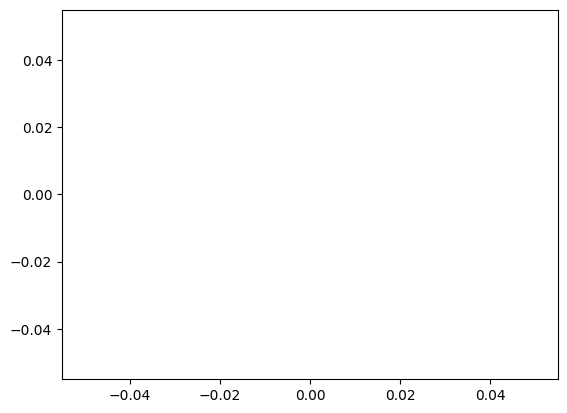

In [7]:
## x=obj, y=count
## distribution to reach ground state?
sns.histplot()

Text(0, 0.5, 'objective value')

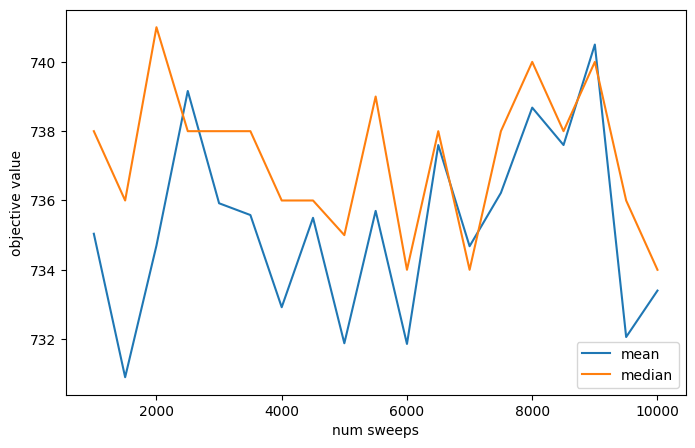

In [8]:
figure, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.lineplot(x=range(1000, 10001, 500), y=var_read_sweeps[0], label="mean")
sns.lineplot(x=range(1000, 10001, 500), y=var_read_sweeps[1], label="median")

plt.xlabel("num sweeps")
plt.ylabel("objective value")

In [9]:
def parse_log(filename):
    with open(filename) as f:
        lines = f.readlines()

    for i in range(len(lines)):
        lines[i] = re.match(r'(.*) - ', lines[i]).group(1)
        lines[i] = datetime.strptime(lines[i], '%y-%m-%d %H:%M:%S')
        
    diff = [(t - s).total_seconds()/500 for s, t in zip(lines, lines[1:])]
    
    return diff

In [10]:
log_10s = parse_log("var_reads_10.log")
log_100s = parse_log("var_reads_100.log")
log_1000s = parse_log("var_reads_1000.log")

[Text(0.5, 0, 'tts'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'tts'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'tts'),
 Text(0, 0.5, 'objective value')]

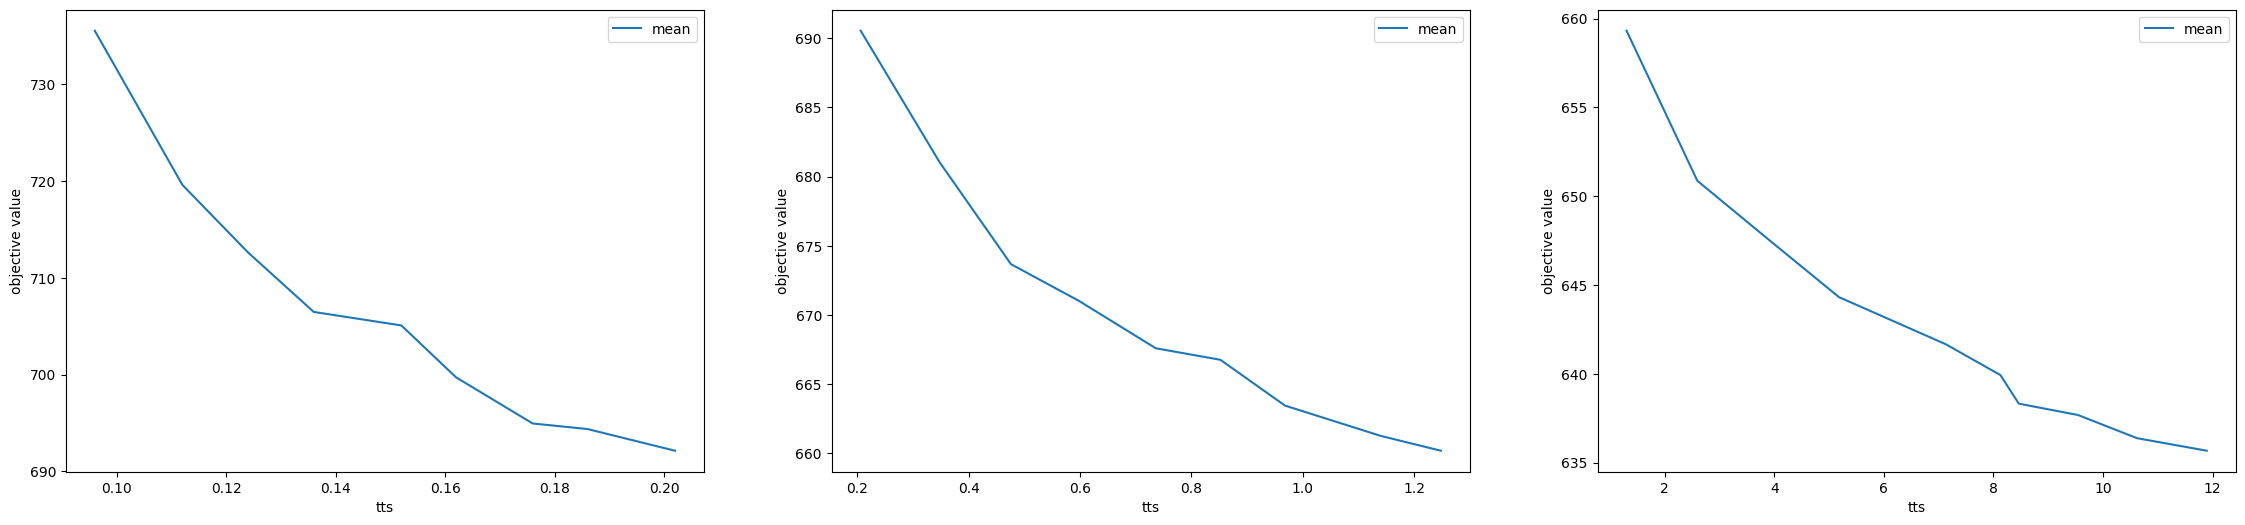

In [11]:
figure, axes = plt.subplots(1, 3, figsize=(28, 6))

sns.lineplot(x=log_10s, y=var_reads_10s[0], ax=axes[0], label="mean")
sns.lineplot(x=log_100s, y=var_reads_100s[0], ax=axes[1], label="mean")
sns.lineplot(x=log_1000s, y=var_reads_1000s[0], ax=axes[2], label="mean")

plt.setp(axes[:], xlabel="tts", ylabel="objective value")

In [12]:
total_logs = log_10s + log_100s + log_1000s
total_reads = var_reads_10s[0] + var_reads_100s[0] + var_reads_1000s[0]

Text(0, 0.5, 'Objective Value')

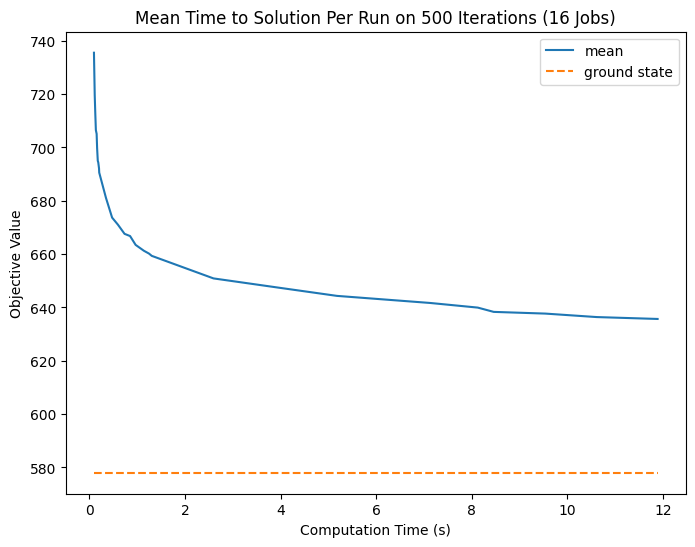

In [13]:
plt.figure(figsize=(8,6))

sns.lineplot(x=total_logs, y=total_reads, label="mean")
sns.lineplot(x=total_logs, y=[ground_state]*len(total_logs), ls='--', label="ground state")

plt.title("Mean Time to Solution Per Run on 500 Iterations (16 Jobs)")
plt.xlabel("Computation Time (s)")
plt.ylabel("Objective Value")

[Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value'),
 Text(0.5, 0, 'num reads'),
 Text(0, 0.5, 'objective value')]

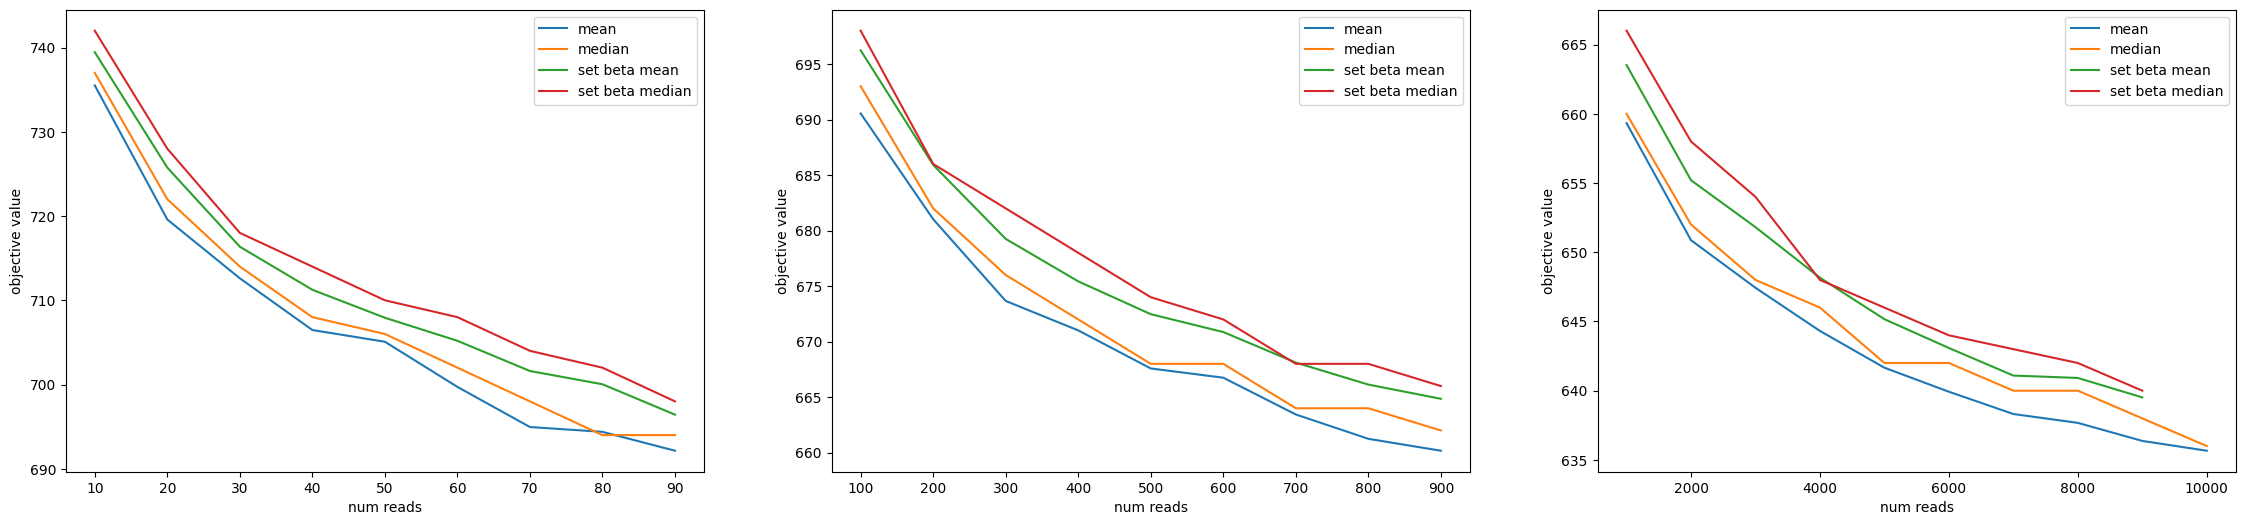

In [14]:
figure, axes = plt.subplots(1, 3, figsize=(28, 6))


sns.lineplot(x=range(10, 100, 10), y=var_reads_10s[0], ax=axes[0], label="mean")
sns.lineplot(x=range(10, 100, 10), y=var_reads_10s[1], ax=axes[0], label="median")
sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[0], ax=axes[1], label="mean")
sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[1], ax=axes[1], label="median")
sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[0], ax=axes[2], label="mean")
sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[1], ax=axes[2], label="median")
# sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[2], ax=axes[2], label="min")
# sns.lineplot(x=range(1000, 11000, 1000), y=[ground_state]*10, ax=axes[2], ls='--', label="ground state")

plt.setp(axes[:], xlabel="num reads", ylabel="objective value")
sns.lineplot(x=range(10, 100, 10), y=var_beta_10s[0], ax=axes[0], label="set beta mean")
sns.lineplot(x=range(10, 100, 10), y=var_beta_10s[1], ax=axes[0], label="set beta median")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_100s[0], ax=axes[1], label="set beta mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_100s[1], ax=axes[1], label="set beta median")
sns.lineplot(x=range(1000, 10000, 1000), y=var_beta_1000s[0], ax=axes[2], label="set beta mean")
sns.lineplot(x=range(1000, 10000, 1000), y=var_beta_1000s[1], ax=axes[2], label="set beta median")
# sns.lineplot(x=range(1000, 11000, 1000), y=var_reads_1000s[2], ax=axes[2], label="min")
# sns.lineplot(x=range(1000, 11000, 1000), y=[ground_state]*10, ax=axes[2], ls='--', label="ground state")

plt.setp(axes[:], xlabel="num reads", ylabel="objective value")

<AxesSubplot:>

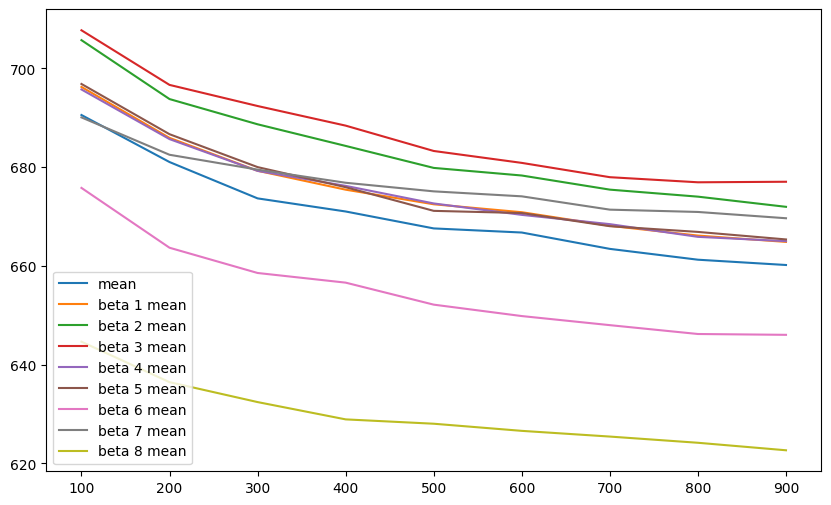

In [35]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[0], label="mean")
# sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[1], label="median")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_100s[0], label="beta 1 mean")
# sns.lineplot(x=range(100, 1000, 100), y=var_beta_100s[1], label="beta 1 median")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_2[0], label="beta 2 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_3[0], label="beta 3 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_4[0], label="beta 4 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_5[0], label="beta 5 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_6[0], label="beta 6 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_7[0], label="beta 7 mean")


# sns.lineplot(x=range(100, 1000, 100), y=[ground_state]*9, ls='--', label="ground state")

<AxesSubplot:>

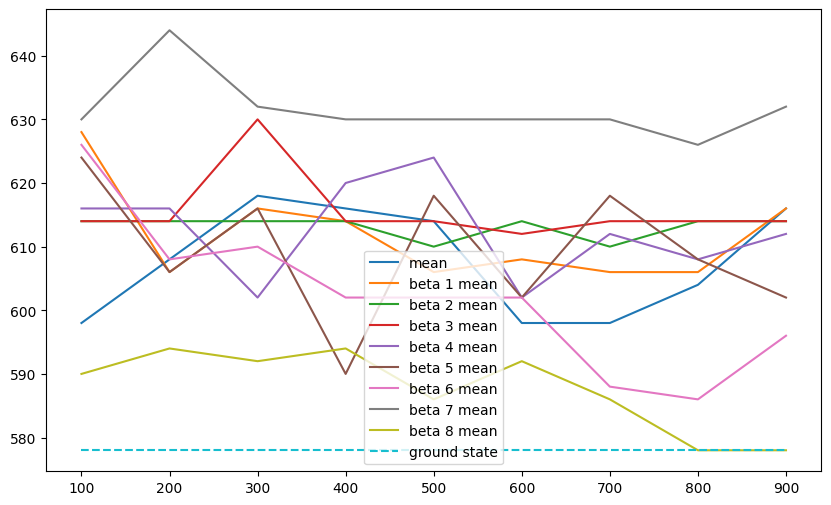

In [36]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[2], label="mean")
# sns.lineplot(x=range(100, 1000, 100), y=var_reads_100s[1], label="median")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_100s[2], label="beta 1 mean")
# sns.lineplot(x=range(100, 1000, 100), y=var_beta_100s[1], label="beta 1 median")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_2[2], label="beta 2 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_3[2], label="beta 3 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_4[2], label="beta 4 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_5[2], label="beta 5 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_6[2], label="beta 6 mean")
sns.lineplot(x=range(100, 1000, 100), y=var_beta_7[2], label="beta 7 mean")


sns.lineplot(x=range(100, 1000, 100), y=[ground_state]*9, ls='--', label="ground state")

<AxesSubplot:>

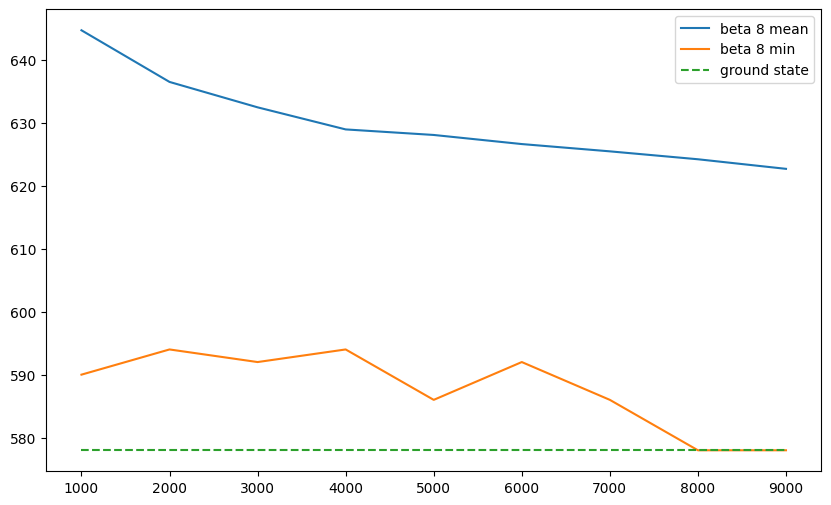

In [38]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x=range(1000, 10000, 1000), y=var_beta_8[0], label="beta 8 mean")
sns.lineplot(x=range(1000, 10000, 1000), y=var_beta_8[2], label="beta 8 min")

sns.lineplot(x=range(1000, 10000, 1000), y=[ground_state]*9, ls='--', label="ground state")